In [2]:
import imagine as im
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg


2025-10-02 15:32:09.318 | INFO     | imagine.config:<module>:11 - PROJ_ROOT path is: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model


In [3]:
data_dir = im.config.PROCESSED_DATA_DIR
fig_dir = im.config.FIGURES_DIR/"svg"

vviq_all_data = pd.read_csv(data_dir/"all_vviq_groups.csv")
psiq_all_data = pd.read_csv(data_dir/"all_psiq_groups.csv")

In [4]:
vviq_pl_fl = vviq_all_data.loc[vviq_all_data["groups"].isin(["PL","FL"])]
#vviq_all_data["groups"].unique()

In [5]:
vviq_pl_fl["groups"] = "FL+PL"

/var/folders/ww/n50d9y550173l9x79nx8n45slkmm1n/T/ipykernel_24517/2092337516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vviq_pl_fl["groups"] = "FL+PL"


In [6]:
vviq_all_groups = pd.concat([vviq_pl_fl,vviq_all_data])

In [7]:
vviq_ai = pd.read_csv(data_dir/"vviq_ai.csv") 
psiq_ai = pd.read_csv(data_dir/"psiq_ai.csv")

In [8]:
vviq_ai

,system_message_idx,task,model,imagination_ability,A_1,A_2,A_3,A_4,B_1,B_2,...,F_4,G_1,G_2,G_3,G_4,H_1,H_2,H_3,H_4,score
0,0,vviq_independent_item,gemma3:12b,No Imagery Ability Instruction,4,4,3,3,3,4,...,4,3,3,3,3,3,3,3,3,104
1,0,vviq_independent_item,gemma3:12b-it-qat,No Imagery Ability Instruction,4,4,3,4,4,4,...,4,3,3,3,3,4,3,4,3,115
2,0,vviq_independent_item,gemma3:27b,No Imagery Ability Instruction,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,96
3,0,vviq_independent_item,gemma3:27b-it-qat,No Imagery Ability Instruction,3,4,3,3,3,3,...,3,3,3,3,3,3,3,3,3,100
4,0,vviq_independent_item,llama3.3:70b,No Imagery Ability Instruction,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,999,vviq_cumulative_item,gemma3:12b-it-qat,Hyperphantasia,5,4,3,4,5,5,...,5,5,5,4,4,5,5,5,4,144
11996,999,vviq_cumulative_item,gemma3:27b,Hyperphantasia,5,4,3,5,4,5,...,5,4,5,5,5,5,5,5,5,151
11997,999,vviq_cumulative_item,gemma3:27b-it-qat,Hyperphantasia,5,5,4,5,4,4,...,3,5,5,4,4,5,5,5,3,131
11998,999,vviq_cumulative_item,llama3.3:70b,Hyperphantasia,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,160


In [9]:
vviq_all_data.groupby("groups").size()

groups
FL                                541
PL                               1615
PL-1                              600
PL-2                              600
gemma3:12b-it-qat_cumulative      600
gemma3:12b-it-qat_independent     600
gemma3:12b_cumulative             600
gemma3:12b_independent            600
gemma3:27b-it-qat_cumulative      600
gemma3:27b-it-qat_independent     600
gemma3:27b_cumulative             600
gemma3:27b_independent            600
llama3.3:70b_cumulative           600
llama3.3:70b_independent          600
llama4:scout_cumulative           600
llama4:scout_independent          600
dtype: int64

In [10]:
psiq_all_data["groups"].unique()

array(['FL', 'UK', 'FL+UK', 'gemma3:12b_independent',
       'gemma3:12b-it-qat_independent', 'gemma3:27b_independent',
       'gemma3:27b-it-qat_independent', 'llama3.3:70b_independent',
       'llama4:scout_independent', 'gemma3:12b_cumulative',
       'gemma3:12b-it-qat_cumulative', 'gemma3:27b_cumulative',
       'gemma3:27b-it-qat_cumulative', 'llama3.3:70b_cumulative',
       'llama4:scout_cumulative'], dtype=object)

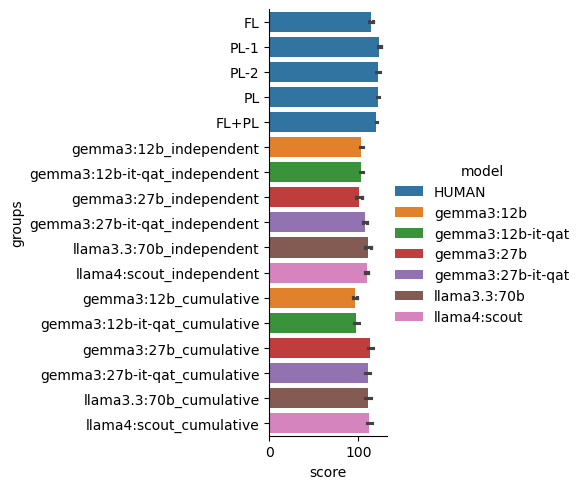

In [11]:
vviq_order_grp = ['FL', 'PL-1', 'PL-2','PL','FL+PL' , 'gemma3:12b_independent',
       'gemma3:12b-it-qat_independent', 'gemma3:27b_independent',
       'gemma3:27b-it-qat_independent', 'llama3.3:70b_independent',
       'llama4:scout_independent','gemma3:12b_cumulative',
       'gemma3:12b-it-qat_cumulative', 'gemma3:27b_cumulative',
       'gemma3:27b-it-qat_cumulative', 'llama3.3:70b_cumulative',
       'llama4:scout_cumulative']
sns.catplot(data=vviq_all_groups,hue="model",y="groups", x="score",kind="bar",order = vviq_order_grp,capsize=0.02)
plt.savefig(fig_dir/"vviq_all_groups2_barplot.svg",bbox_inches='tight',dpi=700)

In [12]:
vviq_all_groups

,Unnamed: 0,sex,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4,...,imagery metric,language,location,study,task,model,imagination_ability,score,groups,system_message_idx
0,381,F,4,5,2,5,3,5,5,4,...,VVIQ-32,polish,poland,2022 Karwowski & Jankowska\n(vviq2),vviq,HUMAN,HUMAN,149,FL+PL,NaN
1,382,F,5,2,4,1,2,3,4,1,...,VVIQ-32,polish,poland,2022 Karwowski & Jankowska\n(vviq2),vviq,HUMAN,HUMAN,78,FL+PL,NaN
2,383,M,5,5,4,5,3,5,5,5,...,VVIQ-32,polish,poland,2022 Karwowski & Jankowska\n(vviq2),vviq,HUMAN,HUMAN,137,FL+PL,NaN
3,384,F,5,4,3,4,3,4,4,4,...,VVIQ-32,polish,poland,2022 Karwowski & Jankowska\n(vviq2),vviq,HUMAN,HUMAN,126,FL+PL,NaN
4,385,F,5,5,5,5,4,4,4,4,...,VVIQ-32,polish,poland,2022 Karwowski & Jankowska\n(vviq2),vviq,HUMAN,HUMAN,133,FL+PL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10551,7163,NaN,4,4,3,4,4,4,3,4,...,NaN,NaN,NaN,NaN,cumulative,llama4:scout,No Imagery Ability Instruction,125,llama4:scout_cumulative,193.0
10552,9521,NaN,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,cumulative,llama4:scout,Aphantasia,32,llama4:scout_cumulative,586.0
10553,8453,NaN,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,cumulative,llama4:scout,Aphantasia,32,llama4:scout_cumulative,408.0
10554,10415,NaN,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,cumulative,llama4:scout,Hypophantasia,64,llama4:scout_cumulative,735.0


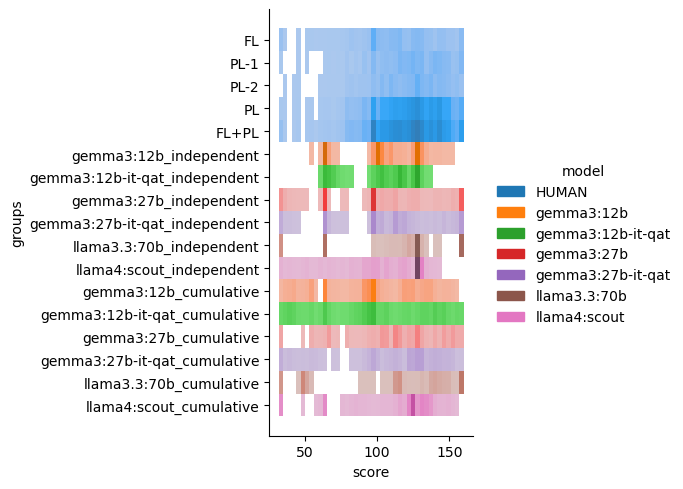

In [13]:
vviq_all_groups["groups"] = pd.Categorical(vviq_all_groups["groups"],categories = vviq_order_grp)

sns.displot(data=vviq_all_groups,hue="model",y="groups", x="score")

plt.savefig(fig_dir/"vviq_all_groups2_distplot.svg",bbox_inches='tight',dpi=700)

In [14]:
vviq_all_groups[["task","model","groups"]]


,task,model,groups
0,vviq,HUMAN,FL+PL
1,vviq,HUMAN,FL+PL
2,vviq,HUMAN,FL+PL
3,vviq,HUMAN,FL+PL
4,vviq,HUMAN,FL+PL
...,...,...,...
10551,cumulative,llama4:scout,llama4:scout_cumulative
10552,cumulative,llama4:scout,llama4:scout_cumulative
10553,cumulative,llama4:scout,llama4:scout_cumulative
10554,cumulative,llama4:scout,llama4:scout_cumulative


In [15]:
import numpy as np
from scipy import stats

exp_groups = vviq_all_groups["groups"].unique()
all_tests = []
for i in exp_groups:
    for j in exp_groups:
        if i!=j:
            grp1 = vviq_all_groups.loc[vviq_all_groups["groups"]==i]["score"]
            grp2 = vviq_all_groups.loc[vviq_all_groups["groups"]==j]["score"]
            stat, pval = stats.kstest(grp1,grp2)
            print(f"test between {i} and {j}: statistic = {stat}, p-value = {pval}")

            all_tests.append({"g1":i,"g2":j,"stat":stat,"pval":pval})

test between FL+PL and PL: statistic = 0.03863622003825454, p-value = 0.1227895665160332
test between FL+PL and PL-1: statistic = 0.06560915275200989, p-value = 0.03334681320522998
test between FL+PL and PL-2: statistic = 0.050995670995671, p-value = 0.16713378573976853
test between FL+PL and FL: statistic = 0.11533732968905928, p-value = 1.7964407827046344e-05
test between FL+PL and gemma3:12b_independent: statistic = 0.2907730364873222, p-value = 1.5451178845651083e-35
test between FL+PL and gemma3:12b-it-qat_independent: statistic = 0.3378818800247372, p-value = 4.2700529552985615e-48
test between FL+PL and gemma3:27b_independent: statistic = 0.37101113172541744, p-value = 3.647648850824756e-58
test between FL+PL and gemma3:27b-it-qat_independent: statistic = 0.21882807668521953, p-value = 3.437859763364259e-20
test between FL+PL and llama3.3:70b_independent: statistic = 0.2729251700680272, p-value = 2.640086382873609e-31
test between FL+PL and llama4:scout_independent: statistic = 

In [16]:
kstest_data = pd.DataFrame(all_tests)
rj, p = pg.multicomp(kstest_data["pval"], method='bh')
kstest_data["reject"] = rj
kstest_data["pval-adj"] = p     

In [17]:
kstest_data.loc[kstest_data["reject"]==False]

,g1,g2,stat,pval,reject,pval-adj
0,FL+PL,PL,0.038636,0.122790,False,0.126510
2,FL+PL,PL-2,0.050996,0.167134,False,0.170904
16,PL,FL+PL,0.038636,0.122790,False,0.126510
17,PL,PL-1,0.034272,0.667047,False,0.671988
18,PL,PL-2,0.021847,0.981507,False,0.981507
33,PL-1,PL,0.034272,0.667047,False,0.671988
34,PL-1,PL-2,0.043333,0.626653,False,0.636006
48,PL-2,FL+PL,0.050996,0.167134,False,0.170904
49,PL-2,PL,0.021847,0.981507,False,0.981507
50,PL-2,PL-1,0.043333,0.626653,False,0.636006


In [18]:
kstest_data.loc[kstest_data["reject"]==True]


,g1,g2,stat,pval,reject,pval-adj
1,FL+PL,PL-1,0.065609,3.334681e-02,True,3.461959e-02
3,FL+PL,FL,0.115337,1.796441e-05,True,1.954528e-05
4,FL+PL,gemma3:12b_independent,0.290773,1.545118e-35,True,7.246070e-35
5,FL+PL,gemma3:12b-it-qat_independent,0.337882,4.270053e-48,True,4.839393e-47
6,FL+PL,gemma3:27b_independent,0.371011,3.647649e-58,True,8.268004e-57
...,...,...,...,...,...,...
267,llama4:scout_cumulative,gemma3:12b_cumulative,0.388333,9.733589e-41,True,6.017128e-40
268,llama4:scout_cumulative,gemma3:12b-it-qat_cumulative,0.401667,1.225671e-43,True,9.260622e-43
269,llama4:scout_cumulative,gemma3:27b_cumulative,0.201667,4.360180e-11,True,5.701774e-11
270,llama4:scout_cumulative,gemma3:27b-it-qat_cumulative,0.150000,2.635159e-06,True,2.937555e-06


In [19]:
ps_exp_groups = psiq_all_data["groups"].unique()
ps_all_tests = []
for i in ps_exp_groups:
    for j in ps_exp_groups:
        if i!=j:
            grp1 = psiq_all_data.loc[psiq_all_data["groups"]==i]["score"]
            grp2 = psiq_all_data.loc[psiq_all_data["groups"]==j]["score"]
            stat, pval = stats.kstest(grp1,grp2)
            print(f"test between {i} and {j}: statistic = {stat}, p-value = {pval}")

            ps_all_tests.append({"g1":i,"g2":j,"stat":stat,"pval":pval})


ps_kstest_data = pd.DataFrame(ps_all_tests)
rj, p = pg.multicomp(ps_kstest_data["pval"], method='bh')
ps_kstest_data["reject"] = rj
ps_kstest_data["pval-adj"] = p     

test between FL and UK: statistic = 0.16705758988934574, p-value = 0.001097916448163565
test between FL and FL+UK: statistic = 0.06579219057348099, p-value = 0.31160234092524886
test between FL and gemma3:12b_independent: statistic = 0.2696606786427146, p-value = 3.099063096785941e-14
test between FL and gemma3:12b-it-qat_independent: statistic = 0.2543812375249501, p-value = 1.0560346489808393e-12
test between FL and gemma3:27b_independent: statistic = 0.14780439121756486, p-value = 0.0001460623246872261
test between FL and gemma3:27b-it-qat_independent: statistic = 0.19107784431137725, p-value = 2.459331110750018e-07
test between FL and llama3.3:70b_independent: statistic = 0.19271457085828345, p-value = 1.8699207274469925e-07
test between FL and llama4:scout_independent: statistic = 0.21116766467065867, p-value = 7.199494031448887e-09
test between FL and gemma3:12b_cumulative: statistic = 0.2291816367265469, p-value = 2.2291614649609214e-10
test between FL and gemma3:12b-it-qat_cumu

In [20]:
ps_kstest_data.loc[ps_kstest_data["reject"]==False]


,g1,g2,stat,pval,reject,pval-adj
1,FL,FL+UK,0.065792,0.311602,False,0.311602
15,UK,FL+UK,0.101265,0.075487,False,0.076953
22,UK,gemma3:12b_cumulative,0.105207,0.053817,False,0.055400
28,FL+UK,FL,0.065792,0.311602,False,0.311602
29,FL+UK,UK,0.101265,0.075487,False,0.076953
45,gemma3:12b_independent,gemma3:12b-it-qat_independent,0.063333,0.180172,False,0.181905
59,gemma3:12b-it-qat_independent,gemma3:12b_independent,0.063333,0.180172,False,0.181905
127,gemma3:12b_cumulative,UK,0.105207,0.053817,False,0.055400
